### Supongamos que quieres saber si el dinero hace feliz a las personas y para analizarlo no dispones de los datos necesarios. Sin embargo existen bancos de datos en abierto preparados para ello, como hemos visto en esta unidad, y poder descargar los datos necesarios.

### Para realizar esta práctica deberás trabajar sobre el Índice para una Vida Mejor del sitio web de la OCDE y las estadísticas del Banco Mundial sobre el producto interno bruto (PIB) per cápita:

    - Busca los datos necesarios para realizar un análisis entre el Índice para una Vida Mejor de la OCDE y el GDP pér cápita del Banco Mundial.
    - Une las tablas obtenidas y las ordenas por PIB per cápita.
    - Ubica el archivo resultante en un nuevo csv dentro del directorio data.
    - Analiza los datos de cada país (índice de satisfacción y PIB per cápita) y represéntalos gráficamente.
    - Saca las conclusiones que estimes necesario en el análisis de los datos.

### Entrega el cuaderno con el código en Python y tus explicaciones con Markdown.

In [1]:
import pandas as pd

# Cargar los dos archivos CSV
better_life_data = pd.read_csv('OECD,DF_BLI,+.SW_LIFS..TOT.csv')
gdp_data = pd.read_csv('gdp-per-capita-worldbank.csv')

# Verificar los datos cargados
print(better_life_data.head())  # Muestra las primeras filas del Índice de Vida Mejor
print(gdp_data.head())         # Muestra las primeras filas del PIB per cápita

  STRUCTURE      STRUCTURE_ID     STRUCTURE_NAME ACTION LOCATION  Country  \
0  DATAFLOW  OECD:DF_BLI(1.0)  Better Life Index      I      EST  Estonia   
1  DATAFLOW  OECD:DF_BLI(1.0)  Better Life Index      I      GRC   Greece   
2  DATAFLOW  OECD:DF_BLI(1.0)  Better Life Index      I      DEU  Germany   
3  DATAFLOW  OECD:DF_BLI(1.0)  Better Life Index      I      FRA   France   
4  DATAFLOW  OECD:DF_BLI(1.0)  Better Life Index      I      FIN  Finland   

  INDICATOR          Indicator MEASURE Measure  ... OBS_VALUE  \
0   SW_LIFS  Life satisfaction       L   Value  ...       6.5   
1   SW_LIFS  Life satisfaction       L   Value  ...       5.8   
2   SW_LIFS  Life satisfaction       L   Value  ...       7.3   
3   SW_LIFS  Life satisfaction       L   Value  ...       6.7   
4   SW_LIFS  Life satisfaction       L   Value  ...       7.9   

   Observation Value  OBS_STATUS  Observation Status UNIT_MEASURE  \
0                NaN           A                 NaN      AVSCORE   
1       

In [ ]:
# Filtrar las columnas necesarias del archivo OECD,DF_BLI,+.SW_LIFS..TOT.csv
better_life_filtered = better_life_data[['LOCATION', 'OBS_VALUE']]

# Filtrar los datos del archivo gdp-per-capita-worldbank.csv para obtener solo los países que coincidan y el año 2022
gdp_filtered = gdp_data[gdp_data['Year'] == 2022]
gdp_filtered = gdp_filtered[gdp_filtered['Code'].isin(better_life_filtered['LOCATION'])]

# Renombrar la columna 'Code' a 'LOCATION' para poder hacer el merge
gdp_filtered = gdp_filtered.rename(columns={'Code': 'LOCATION'})

# Unir los datos filtrados
merged_data = pd.merge(better_life_filtered, gdp_filtered[['Entity', 'LOCATION', 'Year', 'ny_gdp_pcap_pp_kd']], on='LOCATION')

# Reordenar las columnas
merged_data = merged_data[['Entity', 'LOCATION', 'OBS_VALUE', 'ny_gdp_pcap_pp_kd', 'Year']]

# Mostrar los datos
print(merged_data)

            Entity LOCATION  OBS_VALUE  ny_gdp_pcap_pp_kd  Year
0          Estonia      EST        6.5          37711.820  2022
1           Greece      GRC        5.8          31704.426  2022
2          Germany      DEU        7.3          53969.625  2022
3           France      FRA        6.7          45904.410  2022
4          Finland      FIN        7.9          49275.152  2022
5          Denmark      DNK        7.5          59935.120  2022
6          Czechia      CZE        6.9          41052.348  2022
7           Canada      CAN        7.0          49296.380  2022
8          Belgium      BEL        6.8          53287.152  2022
9          Austria      AUT        7.2          55867.184  2022
10       Australia      AUS        7.1          51090.260  2022
11           Chile      CHL        6.2          25886.121  2022
12          Brazil      BRA        6.1          15093.465  2022
13   United States      USA        7.0          64623.125  2022
14  United Kingdom      GBR        6.8  

In [9]:
# Guardar el DataFrame merged_data en un archivo CSV
merged_data.to_csv('merged_data.csv', index=False)

#### Analiza los datos de cada país (índice de satisfacción y PIB per cápita) y represéntalos gráficamente.


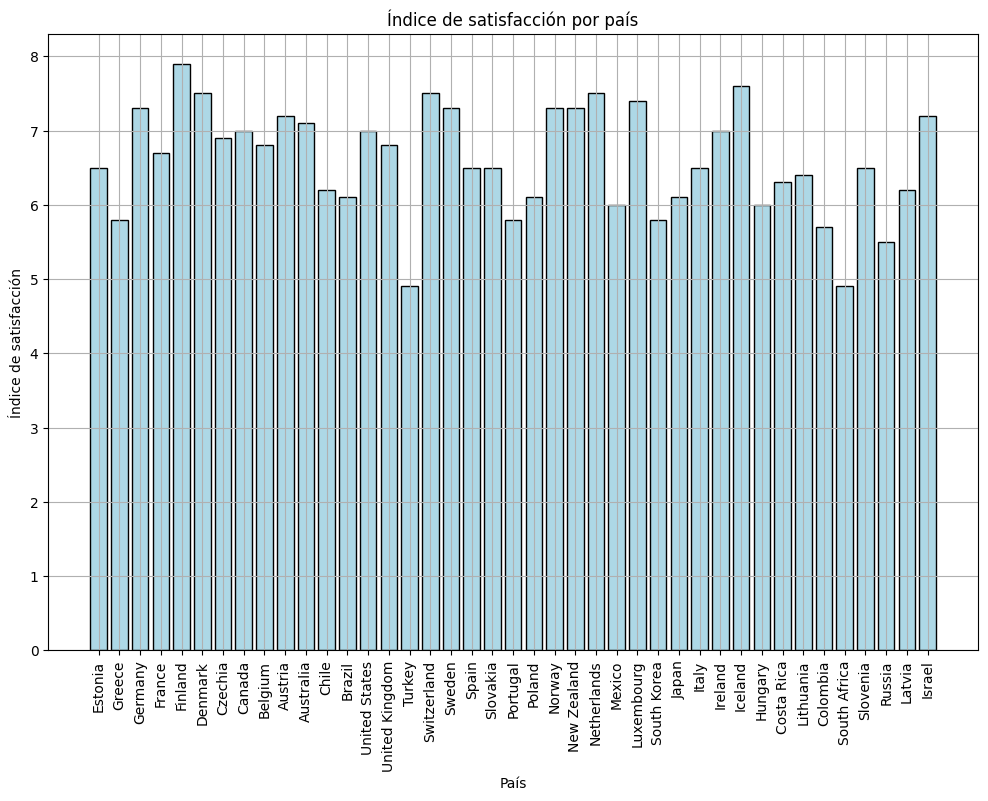

In [13]:
import matplotlib.pyplot as plt

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
plt.bar(merged_data['Entity'], merged_data['OBS_VALUE'], color='lightblue', edgecolor='black')

# Añadir etiquetas y título
plt.xlabel('País')
plt.ylabel('Índice de satisfacción')
plt.title('Índice de satisfacción por país')

# Rotar las etiquetas del eje x para que no se superpongan
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.grid(True)
plt.show()


### Conclusiones del Análisis de Datos

1. **Países con Mayor Índice de Satisfacción**:
    - Finlandia, Dinamarca y Suiza son algunos de los países con los índices de satisfacción más altos, lo cual coincide con su alto PIB per cápita.
    - Islandia también destaca con un alto índice de satisfacción, aunque su PIB per cápita es ligeramente menor en comparación con otros países de Europa Occidental.

2. **Países con Menor Índice de Satisfacción**:
    - Turquía y Sudáfrica tienen los índices de satisfacción más bajos, lo cual también se refleja en su PIB per cápita relativamente bajo.
    - Rusia y Brasil también presentan índices de satisfacción bajos a pesar de tener un PIB per cápita moderado.

3. **Análisis de Desviaciones**:
    - Algunos países como Irlanda y Luxemburgo tienen un PIB per cápita extremadamente alto, pero su índice de satisfacción no es alto, lo que sugiere que otros factores además del PIB per cápita influyen en la satisfacción de vida.
    - Por otro lado, países como Costa Rica y México tienen un índice de satisfacción relativamente alto a pesar de tener un PIB per cápita más bajo, lo que indica que otros factores influyen a la hora de satisfacer el nivel de vida.

4. **Conclusión General**:
    - Aunque existe una correlación positiva entre el PIB y el índice de satisfacción, no es una relación directa. Factores adicionales como la calidad de vida, la seguridad, la salud, la educación y la cultura tienen un impacto significativo en la satisfacción de vida de las personas.
    - Es importante considerar el bienestar de un país, ya que el PIB per cápita por sí solo no proporciona una imagen completa de la calidad de vida y la felicidad de sus ciudadanos